In [2]:
import numpy as np
import pandas as pd

In [3]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Tokenizing Words and Sentences with NLTK

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize

EXAMPLE_TEXT = "Hello Mr. Smith, how are you doing today? The weather is great, and Python is awesome. The sky is pinkish-blue. You shouldn't eat cardboard."

# Sentence Tokenizer
print(sent_tokenize(EXAMPLE_TEXT))

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and Python is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard."]


In [6]:
# Word Tokenizer
print(word_tokenize(EXAMPLE_TEXT))

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', '.']


# Stop words with NLTK

In [7]:
from nltk.corpus import stopwords


In [14]:
stop_words = set(stopwords.words('english'))
print(len(stop_words))
print(list(stop_words)[:10])

179
["aren't", 'them', 'in', 'is', 'are', 'o', 'the', 'over', 'where', 'only']


In [17]:
example_sent = "This is a sample sentence, showing off the stop words filtration."
# word tokenizer
word_tokens = word_tokenize(example_sent)
# filtered sentence : remove stopwords
filtered_sentence = [w for w in word_tokens if not w in stop_words]
print(filtered_sentence)

['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


# Stemming words with NLTK

In [19]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
# porter stemmer
ps = PorterStemmer()

In [24]:
# Stemming example words
example_words = ["python","pythoner","pythoning","pythoned","pythonly"]
stemmed_words = []
for w in example_words:
    stemmed_words.append(ps.stem(w))
print(stemmed_words)

['python', 'python', 'python', 'python', 'pythonli']


In [25]:
# Stemming Sentences
new_text = "It is important to by very pythonly while you are pythoning with python. All pythoners have pythoned poorly at least once."
words = word_tokenize(new_text)
sentence_stemmed_words = []
for w in words:
    sentence_stemmed_words.append(ps.stem(w))
print(sentence_stemmed_words)

['it', 'is', 'import', 'to', 'by', 'veri', 'pythonli', 'while', 'you', 'are', 'python', 'with', 'python', '.', 'all', 'python', 'have', 'python', 'poorli', 'at', 'least', 'onc', '.']


# Part of Speech Tagging with NLTK

In [26]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

In [27]:
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

In [30]:
# train PunktSentenceTokenizer on training data 
custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

In [34]:
# Test tokeniser
tokenized = custom_sent_tokenizer.tokenize(sample_text)
print(len(tokenized), tokenized[:5])

346 ["PRESIDENT GEORGE W. BUSH'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS ON THE STATE OF THE UNION\n \nJanuary 31, 2006\n\nTHE PRESIDENT: Thank you all.", 'Mr. Speaker, Vice President Cheney, members of Congress, members of the Supreme Court and diplomatic corps, distinguished guests, and fellow citizens: Today our nation lost a beloved, graceful, courageous woman who called America to its founding ideals and carried on a noble dream.', 'Tonight we are comforted by the hope of a glad reunion with the husband who was taken so long ago, and we are grateful for the good life of Coretta Scott King.', '(Applause.)', 'President George W. Bush reacts to applause during his State of the Union Address at the Capitol, Tuesday, Jan.']


In [41]:
def process_content():
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            print(tagged)
    except Exception as e:
        print(str(e))
process_content()

[('PRESIDENT', 'NNP'), ('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP'), ("'S", 'POS'), ('ADDRESS', 'NNP'), ('BEFORE', 'IN'), ('A', 'NNP'), ('JOINT', 'NNP'), ('SESSION', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('January', 'NNP'), ('31', 'CD'), (',', ','), ('2006', 'CD'), ('THE', 'NNP'), ('PRESIDENT', 'NNP'), (':', ':'), ('Thank', 'NNP'), ('you', 'PRP'), ('all', 'DT'), ('.', '.')]
[('Mr.', 'NNP'), ('Speaker', 'NNP'), (',', ','), ('Vice', 'NNP'), ('President', 'NNP'), ('Cheney', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('Congress', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Supreme', 'NNP'), ('Court', 'NNP'), ('and', 'CC'), ('diplomatic', 'JJ'), ('corps', 'NN'), (',', ','), ('distinguished', 'JJ'), ('guests', 'NNS'), (',', ','), ('and', 'CC'), ('fellow', 'JJ'), ('citizens', 'NNS'), (':', ':'), ('Today', 'VB'), ('our', 'PRP$'), ('nat

# Chunking with NLTK

In [1]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

In [19]:
def process_content():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            # chunked.draw()

    except Exception as e:
        print(str(e))

process_content()

In [20]:
words = nltk.word_tokenize(tokenized[0])
tagged = nltk.pos_tag(words)
chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
chunkParser = nltk.RegexpParser(chunkGram)
chunked = chunkParser.parse(tagged)

(S
  (Chunk PRESIDENT/NNP GEORGE/NNP W./NNP BUSH/NNP)
  'S/POS
  (Chunk ADDRESS/NNP)
  BEFORE/IN
  (Chunk A/NNP JOINT/NNP SESSION/NNP)
  OF/IN
  (Chunk THE/NNP CONGRESS/NNP ON/NNP THE/NNP STATE/NNP)
  OF/IN
  (Chunk THE/NNP UNION/NNP January/NNP)
  31/CD
  ,/,
  2006/CD
  (Chunk THE/NNP PRESIDENT/NNP)
  :/:
  (Chunk Thank/NNP)
  you/PRP
  all/DT
  ./.)


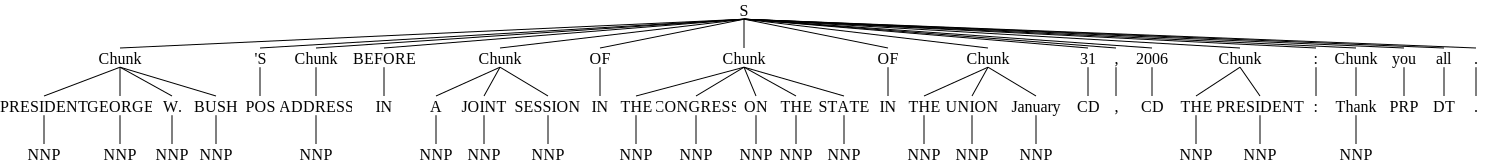

In [21]:
# Chunked tree structure 
print(chunked)
chunked

In [25]:
# Access each subtree iin chunked tree structure
for subtree in chunked.subtrees():
    print(subtree)

(S
  (Chunk PRESIDENT/NNP GEORGE/NNP W./NNP BUSH/NNP)
  'S/POS
  (Chunk ADDRESS/NNP)
  BEFORE/IN
  (Chunk A/NNP JOINT/NNP SESSION/NNP)
  OF/IN
  (Chunk THE/NNP CONGRESS/NNP ON/NNP THE/NNP STATE/NNP)
  OF/IN
  (Chunk THE/NNP UNION/NNP January/NNP)
  31/CD
  ,/,
  2006/CD
  (Chunk THE/NNP PRESIDENT/NNP)
  :/:
  (Chunk Thank/NNP)
  you/PRP
  all/DT
  ./.)
(Chunk PRESIDENT/NNP GEORGE/NNP W./NNP BUSH/NNP)
(Chunk ADDRESS/NNP)
(Chunk A/NNP JOINT/NNP SESSION/NNP)
(Chunk THE/NNP CONGRESS/NNP ON/NNP THE/NNP STATE/NNP)
(Chunk THE/NNP UNION/NNP January/NNP)
(Chunk THE/NNP PRESIDENT/NNP)
(Chunk Thank/NNP)


In [23]:
# Access each subtree iin chunked tree structure
for subtree in chunked.subtrees(filter=lambda t: t.label() == 'Chunk'):
    print(subtree)

(Chunk PRESIDENT/NNP GEORGE/NNP W./NNP BUSH/NNP)
(Chunk ADDRESS/NNP)
(Chunk A/NNP JOINT/NNP SESSION/NNP)
(Chunk THE/NNP CONGRESS/NNP ON/NNP THE/NNP STATE/NNP)
(Chunk THE/NNP UNION/NNP January/NNP)
(Chunk THE/NNP PRESIDENT/NNP)
(Chunk Thank/NNP)


# Chinking with NLTK

In [26]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

In [33]:
def process_content():
    try:
        for i in tokenized[5:]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            # print(tagged)
            chunkGram = r"""Chunk: {<.*>+}
                                    }<VB.?|IN|DT|TO>+{"""

            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)

            # chunked.draw()

    except Exception as e:
        print(str(e))

process_content()

[('White', 'NNP'), ('House', 'NNP'), ('photo', 'NN'), ('by', 'IN'), ('Eric', 'NNP'), ('DraperEvery', 'NNP'), ('time', 'NN'), ('I', 'PRP'), ("'m", 'VBP'), ('invited', 'JJ'), ('to', 'TO'), ('this', 'DT'), ('rostrum', 'NN'), (',', ','), ('I', 'PRP'), ("'m", 'VBP'), ('humbled', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('privilege', 'NN'), (',', ','), ('and', 'CC'), ('mindful', 'NN'), ('of', 'IN'), ('the', 'DT'), ('history', 'NN'), ('we', 'PRP'), ("'ve", 'VBP'), ('seen', 'VBN'), ('together', 'RB'), ('.', '.')]
(S
  (Chunk White/NNP House/NNP photo/NN)
  by/IN
  (Chunk Eric/NNP DraperEvery/NNP time/NN I/PRP)
  'm/VBP
  (Chunk invited/JJ)
  to/TO
  this/DT
  (Chunk rostrum/NN ,/, I/PRP)
  'm/VBP
  humbled/VBN
  by/IN
  the/DT
  (Chunk privilege/NN ,/, and/CC mindful/NN)
  of/IN
  the/DT
  (Chunk history/NN we/PRP)
  've/VBP
  seen/VBN
  (Chunk together/RB ./.))


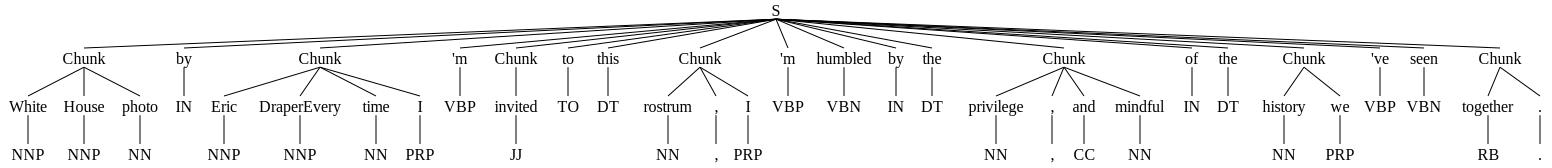

In [39]:
words = nltk.word_tokenize(tokenized[6])
tagged = nltk.pos_tag(words)
print(tagged)
chunkGram = r"""Chunk: {<.*>+}
                        }<VB.?|IN|DT|TO>+{"""

chunkParser = nltk.RegexpParser(chunkGram)
chunked = chunkParser.parse(tagged)
print(chunked)
chunked


# Named Entity Recognition with NLTK

In [2]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

In [3]:
def process_content():
    try:
        for i in tokenized[5:]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            namedEnt = nltk.ne_chunk(tagged, binary=True)
            # namedEnt.draw()
    except Exception as e:
        print(str(e))

process_content()

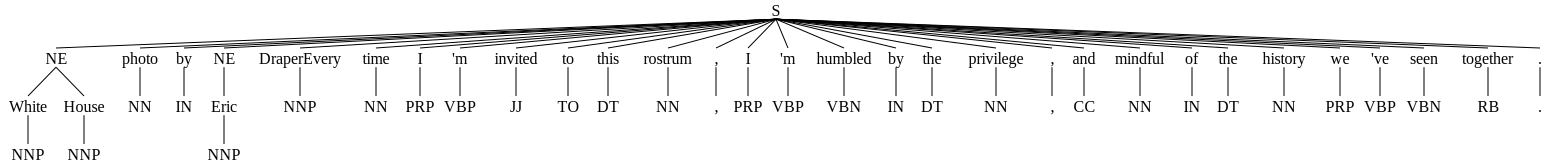

In [11]:
words = nltk.word_tokenize(tokenized[6])
tagged = nltk.pos_tag(words)
namedEnt = nltk.ne_chunk(tagged, binary=True)
namedEnt

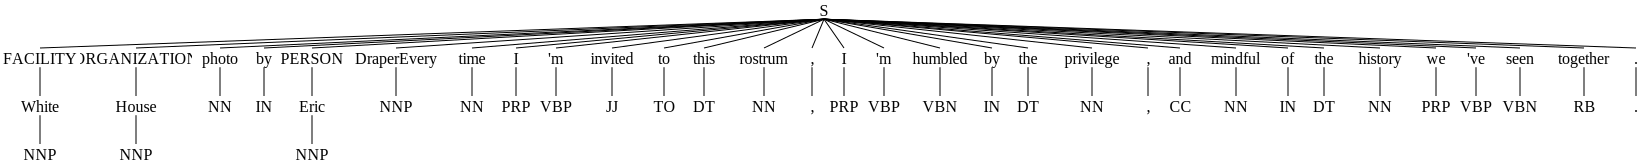

In [22]:
words = nltk.word_tokenize(tokenized[6])
tagged = nltk.pos_tag(words)
namedEnt = nltk.ne_chunk(tagged, binary=False)
namedEnt

# Lemmatizing with NLTK

In [24]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
# pos parameter in lemmatizer;  default value for pos = 'noun' 
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

cat
cactus
goose
rock
python
good
best
run
run


# The corpora with NLTK

In [26]:
import nltk
# nltk location
print(nltk.__file__)

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\__init__.py


In [28]:
# default corpa location for nltk_data :  C:\Users\yourname\AppData\Roaming\nltk_data\corpora
# Within here, we have all of the available corpora, including things like books, chat logs, movie reviews, and a whole lot more.



In [29]:
# accessing these documents via NLTK

from nltk.tokenize import sent_tokenize, PunktSentenceTokenizer
from nltk.corpus import gutenberg

# sample text
sample = gutenberg.raw("bible-kjv.txt")

tok = sent_tokenize(sample)

for x in range(5):
    print(tok[x])

[The King James Bible]

The Old Testament of the King James Bible

The First Book of Moses:  Called Genesis


1:1 In the beginning God created the heaven and the earth.
1:2 And the earth was without form, and void; and darkness was upon
the face of the deep.
And the Spirit of God moved upon the face of the
waters.
1:3 And God said, Let there be light: and there was light.
1:4 And God saw the light, that it was good: and God divided the light
from the darkness.


# Wordnet with NLTK

WordNet is a lexical database for the English language, which was created by Princeton, and is part of the NLTK corpus.


You can use WordNet alongside the NLTK module to find the meanings of words, synonyms, antonyms, and more. Let's cover some examples.


In [2]:
from nltk.corpus import wordnet

# Synsets from a word "program"
syns = wordnet.synsets("program")


In [3]:
syns

[Synset('plan.n.01'),
 Synset('program.n.02'),
 Synset('broadcast.n.02'),
 Synset('platform.n.02'),
 Synset('program.n.05'),
 Synset('course_of_study.n.01'),
 Synset('program.n.07'),
 Synset('program.n.08'),
 Synset('program.v.01'),
 Synset('program.v.02')]

In [4]:
# example
print(syns[0].name())
# Just word
print(syns[0].lemmas())
print(syns[0].lemmas()[0].name())

plan.n.01
[Lemma('plan.n.01.plan'), Lemma('plan.n.01.program'), Lemma('plan.n.01.programme')]
plan


In [5]:
# Defination of first synset
print(syns[0].definition())
# examples of the word in use
print(syns[0].examples())

a series of steps to be carried out or goals to be accomplished
['they drew up a six-step plan', 'they discussed plans for a new bond issue']


In [6]:
# Synonyms and Antonys of a word using nltk synsets
synonyms = []
antonyms = []

for syn in wordnet.synsets("good"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(set(synonyms))
print(set(antonyms))

{'skilful', 'honest', 'adept', 'honorable', 'skillful', 'expert', 'trade_good', 'safe', 'thoroughly', 'salutary', 'dependable', 'unspoiled', 'practiced', 'goodness', 'proficient', 'dear', 'in_force', 'undecomposed', 'respectable', 'just', 'good', 'right', 'upright', 'near', 'well', 'effective', 'serious', 'beneficial', 'commodity', 'in_effect', 'full', 'soundly', 'secure', 'ripe', 'estimable', 'sound', 'unspoilt'}
{'bad', 'badness', 'evilness', 'evil', 'ill'}


In [7]:
# comparison between two noun ship and boat

w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('boat.n.01')
print(w1.wup_similarity(w2))

0.9090909090909091


In [8]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('car.n.01')
print(w1.wup_similarity(w2))

0.6956521739130435


In [11]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('cat.n.01')
print(w1.wup_similarity(w2))

0.32


# Text Classification with NLTK

In [16]:
import nltk
import random
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)


documents is a list of tuples with two elements: first element a list of words and second is feature (in string) pos/neg

In [19]:
# Create a list of all the words in movie reviews 
all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())

In [21]:

all_words = nltk.FreqDist(all_words)
# top 15 most common words used in movie reviews dataset
print(all_words.most_common(15))
# occurence of word 'stupid'
print(all_words["stupid"])

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822), ('s', 18513), ('"', 17612), ('it', 16107), ('that', 15924), ('-', 15595)]
253


# Converting words to Features with NLTK

In [22]:
import nltk
import random
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

all_words = []

for w in movie_reviews.words():
    all_words.append(w.lower())

In [27]:
all_words = nltk.FreqDist(all_words)

word_features = list(dict(all_words.most_common(3000)).keys())

In [29]:
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [35]:
# for each word in each document crerate a feature set depending upon it's availability in top 3000 most common words set
featuresets = [(find_features(rev), category) for (rev, category) in documents]

Git branching